CUST_ID: Credit card holder ID

BALANCE: Monthly average balance (based on daily balance averages)

BALANCE_FREQUENCY: Ratio of last 12 months with balance

PURCHASES: Total purchase amount spent during last 12 months

ONEOFF_PURCHASES: Total amount of one-off purchases

INSTALLMENTS_PURCHASES: Total amount of installment purchases

CASH_ADVANCE: Total cash-advance amount

PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)

ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency

AVERAGE_PURCHASE_TRX: Average amount per purchase transaction

CASH_ADVANCE_TRX: Average amount per cash-advance transaction

PURCHASES_TRX: Average amount per purchase transaction

CREDIT_LIMIT: Credit limit

PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period

MINIMUM_PAYMENTS: Total minimum payments due in the period.

PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

TENURE: Number of months as a customer

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data=pd.read_csv(r"C:\Users\ygala\OneDrive\Desktop\projects\clustering\CC_GENERAL.csv")
df=pd.DataFrame(data)
columns_to_fill = df.columns.difference(['CUST_ID'])
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean(axis=0))
scaler=StandardScaler()
from scipy import stats
X = df[columns_to_fill][(np.abs(stats.zscore(df[columns_to_fill])) < 2.5).all(axis=1)]



In [53]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Elbow Method

In [54]:
from sklearn.cluster import KMeans

distortions=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,max_iter=100,random_state=42)
    kmean.fit(X)
    distortions.append(kmean.inertia_ /X.shape[0])


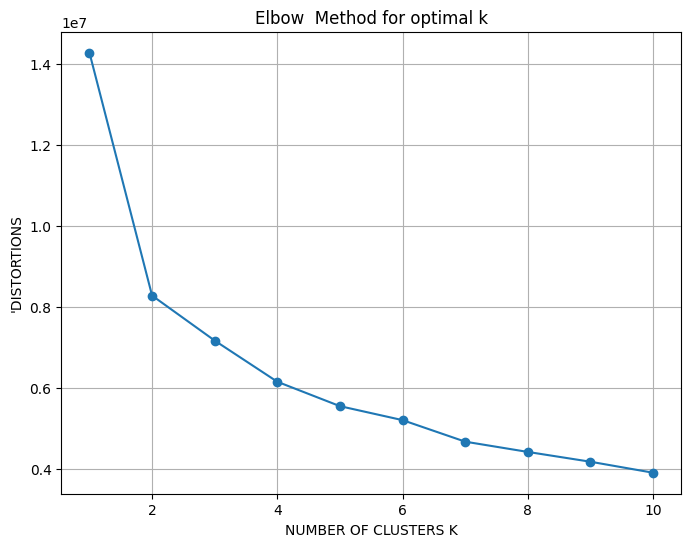

In [55]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),distortions,marker='o',linestyle='-')
plt.xlabel("NUMBER OF CLUSTERS K")
plt.ylabel("'DISTORTIONS")
plt.title("Elbow  Method for optimal k")
plt.grid()
plt.show()

### K=2 IS THE OPTIMAL NUMBER

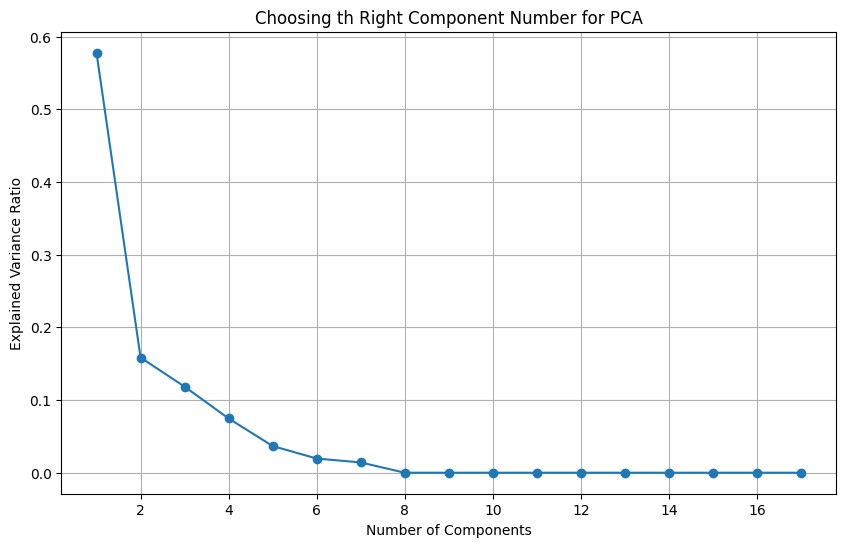

In [56]:
from sklearn.decomposition import PCA
optimal_k=2
kmeans=KMeans(n_clusters=optimal_k,max_iter=100,random_state=42)
cluster_labels=kmeans.fit_predict(X)


pca=PCA(n_components=None)

x_scaled=pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Choosing th Right Component Number for PCA')
plt.grid()
plt.show()

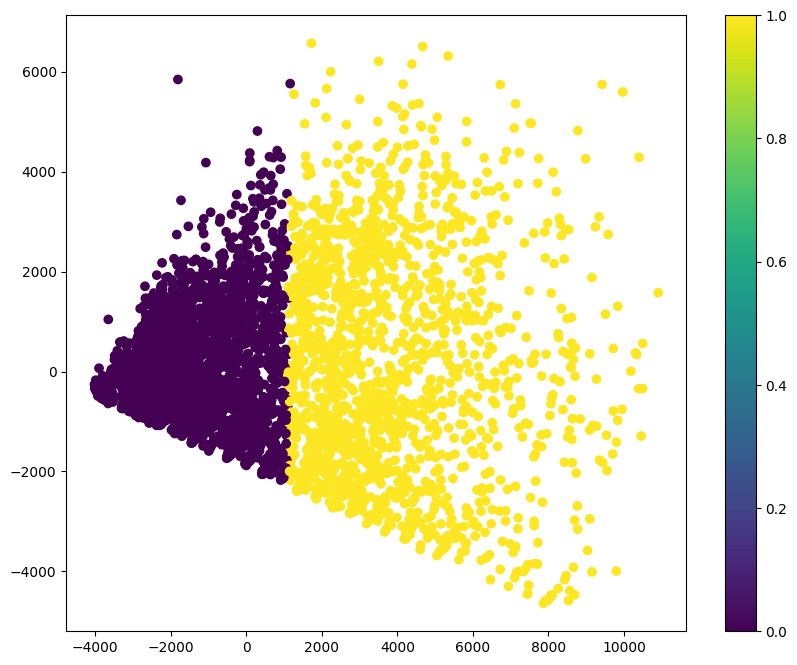

In [ ]:
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10, 8))



plt.scatter(
    x_scaled[:, 0],  
    x_scaled[:, 1],
    c=cluster_labels,
    cmap='viridis'
)

plt.colorbar()

plt.show()

In [58]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.4536962238123929


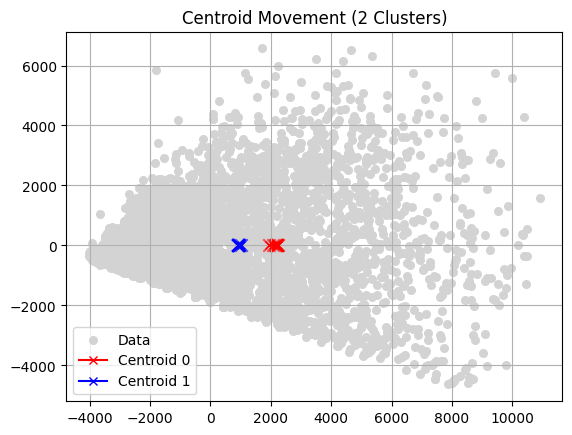

In [66]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=300, max_iter=10)
centroid_history = []

# Run manual iterations to track centroids
for i in range(10):
    kmeans.partial_fit(X)
    centroid_history.append(kmeans.cluster_centers_.copy())

# Plot data points
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c='lightgray', s=30, label='Data')

# Plot centroid movement
colors = ['red', 'blue']
for cluster_id in range(2):
    x = [c[cluster_id][0] for c in centroid_history]
    y = [c[cluster_id][1] for c in centroid_history]
    plt.plot(x, y, marker='x', color=colors[cluster_id], label=f'Centroid {cluster_id}')
    plt.scatter(x, y, s=80, marker='x',c=colors[cluster_id], alpha=0.6)

plt.title("Centroid Movement (2 Clusters)")
plt.legend()
plt.grid(True)
plt.show()